# **Generative Adversarial Networks (GANs) - A Comprehensive Tutorial**
  ###                         By
  ###                   Name: A.Mohammed Ismail
  ###                   Reg. Number: 23090359

## **4. Implementing GANs**

## 4.1. Importing Required Libraries

In [1]:
# Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


## 4.2. Define the Generator
# 🎨 Generator Network for GANs  

The **Generator** is a key component of a **Generative Adversarial Network (GAN)**.  
It learns to create **fake images** that resemble real ones by transforming a **random noise vector** into structured image data.  

---

## 🔹 Class: `Generator`  

### ✅ Purpose  
- Generates **fake images** from a random latent vector.  
- Learns to produce outputs that resemble real images.  

### ✅ Initialization (`__init__` Method)  
- **input_dim**: Size of the random noise vector.  
- **output_dim**: Size of the generated image (e.g., number of pixels).  
- **Model Architecture**:  
  - **Fully Connected Layers**: Expands the noise vector into meaningful features.  
  - **ReLU Activations**: Helps the network learn **complex patterns**.  
  - **Tanh Activation**: Normalizes pixel values between **-1 and 1** to match real image distributions.  

---

## 🔹 Forward Pass (`forward` Method)  
- **Takes a random noise vector** as input.  
- **Passes it through a series of linear transformations** to generate an image.  
- **Returns the final fake image** with pixel values between **-1 and 1**.  

---
 
✅ Converts **random noise** into **structured images**  
✅ Uses **ReLU activations** to learn complex patterns  
✅ Normalizes output with **Tanh** for stable training  
✅ A critical part of **GANs** for generating realistic images  
 


In [2]:
class Generator(nn.Module):
    """
    The Generator creates fake images from a random noise vector.
    It learns to generate images that resemble real ones.
    """

    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),  # Expands noise to meaningful features
            nn.ReLU(),  # Activation for learning complex patterns
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),  # Outputs image-sized data
            nn.Tanh()  # Normalizes pixels between -1 and 1
        )
    
    def forward(self, x):
        return self.model(x)


## 4.3 Define the Discriminator
🛡️ Discriminator Network for GANs  

The **Discriminator** is a crucial part of a **Generative Adversarial Network (GAN)**.  
It acts as a **binary classifier**, distinguishing between **real** and **fake** images.  

---

In [3]:
class Discriminator(nn.Module):
    """
    The Discriminator is a binary classifier.
    It differentiates between real and fake images.
    """

    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2),  # Prevents vanishing gradient problem
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),  # Binary classification (real/fake)
            nn.Sigmoid()  # Outputs probability (0 to 1)
        )
    
    def forward(self, x):
        return self.model(x)


## 🔹 Class: `Discriminator`  

### ✅ Purpose  
- **Classifies images** as **real (1)** or **fake (0)**.  
- Trains alongside the **Generator** to improve adversarial learning.  

### ✅ Initialization (`__init__` Method)  
- **input_dim**: Size of the input image (number of pixels).  
- **Model Architecture**:  
  - **Fully Connected Layers**: Extracts important features from the image.  
  - **LeakyReLU Activation (0.2)**:  
    - Prevents the **vanishing gradient** problem.  
    - Allows small gradients even for negative inputs.  
  - **Sigmoid Activation**:  
    - Outputs a **probability** between **0 and 1**.  
    - Helps in binary classification (Real vs. Fake).  

---

## 🔹 Forward Pass (`forward` Method)  
- **Receives an image (real or generated).**  
- **Passes it through a series of layers** to extract features.  
- **Outputs a probability** indicating whether the image is **real or fake**.  

---

## 🎯   
✅ **Binary classifier** for real vs. fake images  
✅ Uses **LeakyReLU** to avoid vanishing gradients  
✅ Outputs a probability with **Sigmoid activation**  
✅ Works with the **Generator** to improve image generation  

⚡ Ready to classify images! 🚀  

## 4.4 Set Hyperparameters and Load Data

🎯 Hyperparameter Definition & Data Loading for GAN  

This section initializes **hyperparameters** and loads the **MNIST dataset** for training a **Generative Adversarial Network (GAN)**.  

---

In [4]:
# Define hyperparameters
input_dim = 100  # Size of noise vector
image_dim = 28 * 28  # MNIST image size (flattened)
batch_size = 64  # Batch size for training
epochs = 100  # Number of training iterations

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


100.0%
100.0%
100.0%
100.0%


## 🔹 Define Hyperparameters  
- **input_dim = 100** → Size of the random noise vector for the **Generator**.  
- **image_dim = 28 × 28** → MNIST image size (flattened to 784 pixels).  
- **batch_size = 64** → Number of samples processed in one training iteration.  
- **epochs = 100** → Number of training iterations for the GAN.  

---

## 🔹 Load the MNIST Dataset  
- **Dataset**: Uses the MNIST dataset of handwritten digits (0-9).  
- **Transformations**:  
  - **ToTensor()** → Converts images to PyTorch tensors.  
  - **Normalize((0.5,), (0.5,))** → Scales pixel values between **-1 and 1**, which is beneficial for **Tanh activation** in the Generator.  
- **DataLoader**:  
  - **batch_size = 64** → Loads images in mini-batches for efficient training.  
  - **shuffle = True** → Shuffles data to improve training randomness.  

---

## 🎯   
✅ **Defines key hyperparameters** for GAN training  
✅ **Loads & normalizes MNIST dataset** for image generation  
✅ **Uses DataLoader** to provide shuffled mini-batches  

⚡ Ready for GAN training! 🚀

## 4.5  Initialize Models and Optimizers

🎯 Initialize Generator, Discriminator & Training Components  

This section initializes the **Generator** and **Discriminator**, defines the **loss function**, and sets up the **optimizers** for training a Generative Adversarial Network (GAN).  

---

In [5]:
# Create Generator and Discriminator
generator = Generator(input_dim, image_dim)
discriminator = Discriminator(image_dim)

# Define loss function (Binary Cross-Entropy)
criterion = nn.BCELoss()

# Use Adam optimizer for stability
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)


## 🔹 Create Generator & Discriminator  
- **Generator**: Converts a random noise vector (**input_dim**) into a realistic-looking image (**image_dim = 28×28** for MNIST).  
- **Discriminator**: A binary classifier that distinguishes between **real** and **fake** images.  

## 4.6 Training the GAN

In [6]:
# Lists to store losses for visualization
generator_losses = []
discriminator_losses = []

# Start training loop
for epoch in range(epochs):
    for real_images, _ in dataloader:
        real_images = real_images.view(-1, image_dim)  # Flatten images
        batch_size = real_images.size(0)
        
        # Generate random noise and create fake images
        z = torch.randn(batch_size, input_dim)
        fake_images = generator(z)

        # Define real and fake labels
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train Discriminator
        optimizer_D.zero_grad()
        loss_real = criterion(discriminator(real_images), real_labels)
        loss_fake = criterion(discriminator(fake_images.detach()), fake_labels)
        loss_D = loss_real + loss_fake
        loss_D.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        loss_G = criterion(discriminator(fake_images), real_labels)  # Trick Discriminator
        loss_G.backward()
        optimizer_G.step()
    
    # Store losses
    generator_losses.append(loss_G.item())
    discriminator_losses.append(loss_D.item())
    
    # Print training progress
    print(f"Epoch [{epoch+1}/{epochs}] | Loss D: {loss_D.item():.4f} | Loss G: {loss_G.item():.4f}")


Epoch [1/100] | Loss D: 1.7840 | Loss G: 2.5137
Epoch [2/100] | Loss D: 0.4210 | Loss G: 2.4986
Epoch [3/100] | Loss D: 0.2035 | Loss G: 3.6126
Epoch [4/100] | Loss D: 0.0531 | Loss G: 5.2688
Epoch [5/100] | Loss D: 0.1515 | Loss G: 11.8030
Epoch [6/100] | Loss D: 0.2989 | Loss G: 4.9149
Epoch [7/100] | Loss D: 0.4917 | Loss G: 3.3611
Epoch [8/100] | Loss D: 0.0891 | Loss G: 5.3572
Epoch [9/100] | Loss D: 0.5625 | Loss G: 4.8658
Epoch [10/100] | Loss D: 0.1242 | Loss G: 4.0963
Epoch [11/100] | Loss D: 0.1599 | Loss G: 5.8167
Epoch [12/100] | Loss D: 0.1768 | Loss G: 4.7990
Epoch [13/100] | Loss D: 0.3933 | Loss G: 4.2723
Epoch [14/100] | Loss D: 0.3028 | Loss G: 4.2417
Epoch [15/100] | Loss D: 0.3304 | Loss G: 4.0205
Epoch [16/100] | Loss D: 0.2719 | Loss G: 4.4242
Epoch [17/100] | Loss D: 0.2617 | Loss G: 4.1096
Epoch [18/100] | Loss D: 0.3385 | Loss G: 2.8173
Epoch [19/100] | Loss D: 0.4423 | Loss G: 3.7824
Epoch [20/100] | Loss D: 0.3578 | Loss G: 4.6124
Epoch [21/100] | Loss D: 0.4

# 🎯 GAN Training Loop  

This section implements the **training process** for a **Generative Adversarial Network (GAN)**. The model is trained using **real images from MNIST** and **generated fake images**, updating both the **Generator (G)** and **Discriminator (D)** iteratively.  

## 🔹 Lists to Track Losses  
- `generator_losses`: Stores Generator loss values over epochs.  
- `discriminator_losses`: Stores Discriminator loss values over epochs.  

## 🔹 Training Loop Overview  
The model is trained for `epochs` iterations. Each **epoch** consists of multiple **mini-batch** updates.  

### 1️⃣ **Process Real Images**  
- Load a batch of **real images** and **flatten** them into vectors.  

### 2️⃣ **Generate Fake Images**  
- Create a **random noise vector (z)**.  
- Use the **Generator** to create **fake images** from noise.  

### 3️⃣ **Define Real & Fake Labels**  
- **Real images → Label 1**  
- **Fake images → Label 0**  

## 🔹 Discriminator Training  
- Compute **Discriminator loss** for real and fake images.  
- Update weights using **backpropagation**.  

## 🔹 Generator Training  
- The **Generator** aims to **trick** the Discriminator by making fake images appear real.  
- Uses **real_labels** to **fool** the Discriminator.  
- Updates Generator weights via **backpropagation**.  

## 🔹 Store Losses & Monitor Progress  
- Logs **losses** for visualization.  
- Prints training progress at each **epoch**.  

## 🎯 
✅ **Trains Generator to create realistic images**  
✅ **Trains Discriminator to differentiate real vs fake images**  
✅ **Tracks losses for visualization**  
✅ **Prints training progress after each epoch**  

⚡ The GAN is learning! 🚀  


## 4.7 Visualizing Training Loss

📊 Plotting GAN Loss Curves  

This function **visualizes** the training process of a **Generative Adversarial Network (GAN)** by plotting the **Generator** and **Discriminator** loss curves over epochs.  

## 🔹 Function: `plot_losses()`  
### ✅ **Parameters**  
- `generator_losses`: List tracking loss values for the Generator.  
- `discriminator_losses`: List tracking loss values for the Discriminator.  

### 🔹 **Plot Customization**  
- **X-axis** → Represents training **epochs**.  
- **Y-axis** → Represents **loss values**.  
- **Blue Line** → Generator Loss (G).  
- **Red Line** → Discriminator Loss (D).  
- **Title** → "GAN Training Loss" for clarity.  
- **Legend** → Helps differentiate between **G** and **D** losses.  

## 🔹 Visualization Purpose  
- Helps analyze **GAN training stability**.  
- Observes if **Discriminator overpowers Generator**.  
- Detects issues like **mode collapse or vanishing gradients**.  

### 🎯  
✅ **Monitors GAN Training Progress**  
✅ **Provides insights into convergence**  
✅ **Detects instability in loss trends**  

🚀 Now visualize how well your GAN is training! 📈  


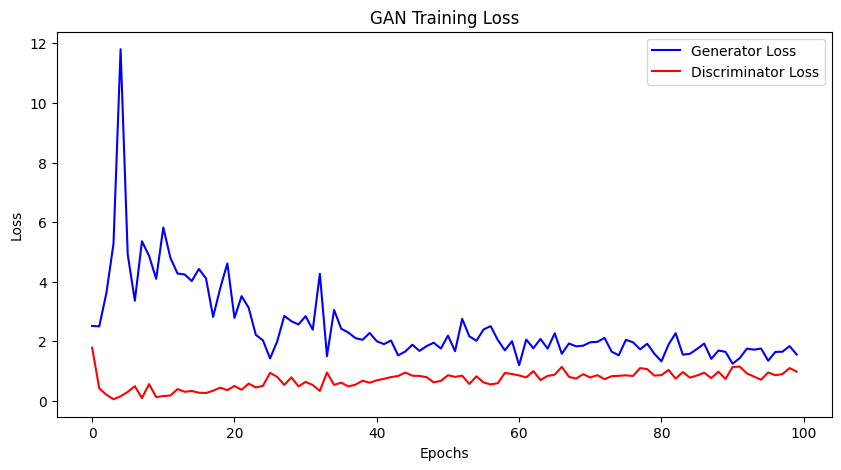

In [7]:
# Function to plot loss curves
def plot_losses(generator_losses, discriminator_losses):
    plt.figure(figsize=(10,5))
    plt.plot(generator_losses, label="Generator Loss", color='blue')
    plt.plot(discriminator_losses, label="Discriminator Loss", color='red')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("GAN Training Loss")
    plt.show()

# Plot the loss curves
plot_losses(generator_losses, discriminator_losses)


## 4.8 Generate Fake Images

🎨 Generating & Visualizing Fake Images  

This function generates and displays **synthetic images** created by a **GAN's Generator**.  

## 🔹 Function: `generate_images()`  
### ✅ **Parameters**  
- `generator`: The trained **Generator model**.  
- `num_images`: Number of **fake images** to generate (default = 16).  
- `image_dim`: The **height/width** of the image (default = 28 for MNIST).  

### 🔹 **Steps in Image Generation**  
1. **Generate Noise** → Creates a **random latent vector** (`z`) from a normal distribution.  
2. **Pass Noise to Generator** → Produces **fake images**.  
3. **Detach & Convert to NumPy** → Prepares data for visualization.  
4. **Plot Images** → Displays them in a **4x4 grid**.  
5. **Grayscale Visualization** → Uses `cmap='gray'` for clearer representation.  

## 🔹 Why is this Important?  
- **Assess Generator Performance** 🎭  
- **Visualize Improvements over Epochs** 📈  
- **Detect Mode Collapse or Blurriness** ⚠️  

### 🎯   
✅ **Generates fake images from noise**  
✅ **Displays a 4x4 grid of outputs**  
✅ **Helps track GAN training progress**  

🚀 Ready to see how well your Generator performs? 🔥  


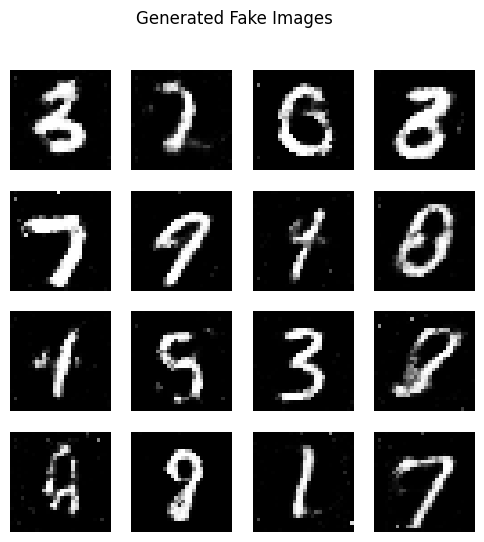

In [8]:
# Function to generate and visualize fake images
def generate_images(generator, num_images=16, image_dim=28):
    z = torch.randn(num_images, 100)  # Generate noise
    fake_images = generator(z).detach().numpy()
    
    fig, axes = plt.subplots(4, 4, figsize=(6,6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(fake_images[i].reshape(image_dim, image_dim), cmap='gray')  # Convert to 2D
        ax.axis('off')
    plt.suptitle("Generated Fake Images")
    plt.show()

# Display generated images
generate_images(generator)
